# Convolution of a Disk with 2 Impulses

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
from skimage import draw
from scipy import signal

To analyze the different modes of fftconvolve(), we will convolute a disk with 2 impulses.

## Part I
We start the simulation with inputs with same sizes.

In [2]:
#Images' size:
size_x=100
size_y=60

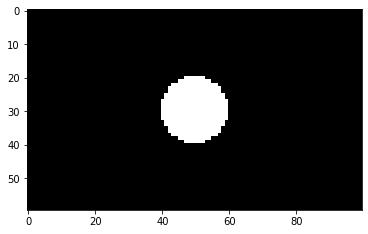

In [3]:
#Image with disk: x(t)
def surface_disk(radi,sx,sy):
    arr = np.zeros((sy, sx), dtype=float)
    rr, cc = draw.disk(((sy-1)/2,(sx-1)/2),radi)
    arr[rr, cc] = 1
    return arr

radius=10
x=surface_disk(radius,size_x,size_y)

plt.imshow(x, cmap='gray')
plt.show()

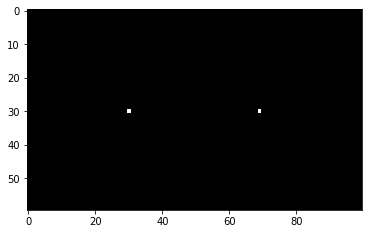

In [4]:
#Image with impulses: d(t)
def sources_s(dist,sx,sy):
    output=np.zeros((sy,sx), dtype=float) #Generates a sy by sx null matrix
    output[math.floor(sy/2),math.ceil((sx-1)/2-dist)]=1  #Sets to 1 a position at distance -dist respect to the center
    output[math.floor(sy/2),math.floor((sx-1)/2+dist)]=1 #Sets to 1 a position at distance +dist respect to the center
    return output

distance=20
d=sources_s(distance,size_x,size_y)

plt.imshow(d, cmap='gray')
plt.show()

We will convolute it following this order: 'full', 'valid', 'same'.

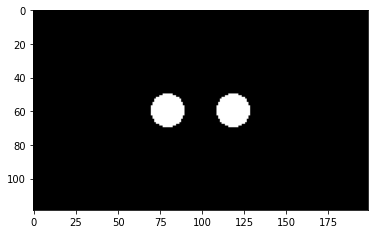

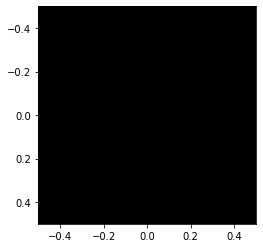

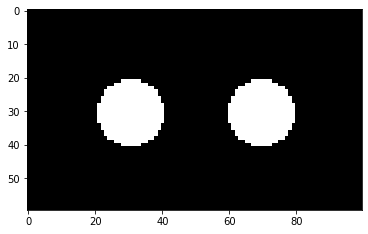

In [5]:
y_full = signal.fftconvolve(x, d, mode='full')
y_valid = signal.fftconvolve(x, d, mode='valid')
y_same = signal.fftconvolve(x, d, mode='same')

plt.imshow(y_full, cmap='gray')
plt.show()
plt.imshow(y_valid, cmap='gray')
plt.show()
plt.imshow(y_same, cmap='gray')
plt.show()

The results are:
 - Full: It has generated the correct shape. The resulting size is the sum of booth inputs (100,60)*(100,60)=(200,120).
 - Valid: It has NOT generated the correct shape. It has generated one single pixel.
 - Same: It has generated the correct shape. The resulting size is input_1's size (100,60)*(100,60)=(100,60).

## Part II
Now, we repeat the simulation with inputs with diferent sizes.

In [6]:
#Images' size:
size_x_disk=100
size_y_disk=60
size_x_impulse=140
size_y_impulse=90

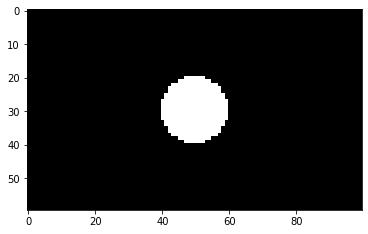

In [7]:
#Image with disk: x(t)
def surface_disk(radi,sx,sy):
    arr = np.zeros((sy, sx), dtype=float)
    rr, cc = draw.disk(((sy-1)/2,(sx-1)/2),radi)
    arr[rr, cc] = 1
    return arr

radius=10
x=surface_disk(radius,size_x_disk,size_y_disk)

plt.imshow(x, cmap='gray')
plt.show()

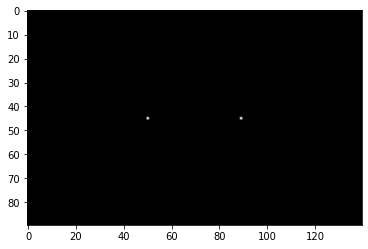

In [8]:
#Image with impulses: d(t)
def sources_s(dist,sx,sy):
    output=np.zeros((sy,sx), dtype=float) #Generates a sy by sx null matrix
    output[math.floor(sy/2),math.ceil((sx-1)/2-dist)]=1  #Sets to 1 a position at distance -dist respect to the center
    output[math.floor(sy/2),math.floor((sx-1)/2+dist)]=1 #Sets to 1 a position at distance +dist respect to the center
    return output

distance=20
d=sources_s(distance,size_x_impulse,size_y_impulse)

plt.imshow(d, cmap='gray')
plt.show()

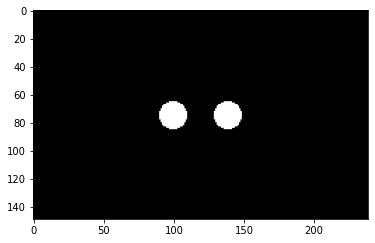

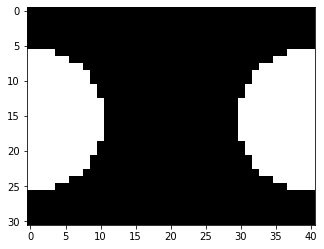

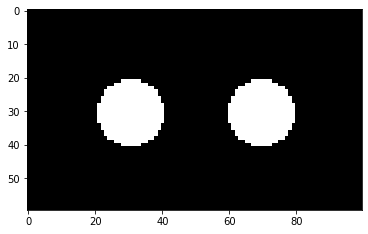

In [9]:
y_full = signal.fftconvolve(x, d, mode='full')
y_valid = signal.fftconvolve(x, d, mode='valid')
y_same = signal.fftconvolve(x, d, mode='same')

plt.imshow(y_full, cmap='gray')
plt.show()
plt.imshow(y_valid, cmap='gray')
plt.show()
plt.imshow(y_same, cmap='gray')
plt.show()

The results are:
 - Full: It has generated the correct shape. The resulting size is the sum of booth inputs (100,60)*(140,90)=(240,150).
 - Valid: It has generated the correct shape. The resulting size is the difference of booth inputs (100,60)*(140,90)=(40,30).
 - Same: It has generated the correct shape. The resulting size is input_1's size (100,60)*(140,90)=(100,60).

As the output size of the 'valid' mode is the difference between the largest input's size minus the smallest input's size, one of the inputs has to be bigger in both directions than the smaller one.

## Part III
Now, we repeat the simulation with inputs with diferent sizes. One image has larger width and the other has larger height.

In [10]:
#Images' size:
size_x_disk=100
size_y_disk=90
size_x_impulse=140
size_y_impulse=60

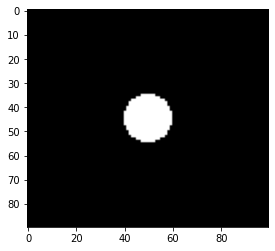

In [11]:
#Image with disk: x(t)
def surface_disk(radi,sx,sy):
    arr = np.zeros((sy, sx), dtype=float)
    rr, cc = draw.disk(((sy-1)/2,(sx-1)/2),radi)
    arr[rr, cc] = 1
    return arr

radius=10
x=surface_disk(radius,size_x_disk,size_y_disk)

plt.imshow(x, cmap='gray')
plt.show()

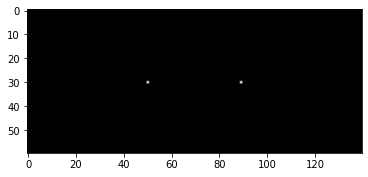

In [12]:
#Image with impulses: d(t)
def sources_s(dist,sx,sy):
    output=np.zeros((sy,sx), dtype=float) #Generates a sy by sx null matrix
    output[math.floor(sy/2),math.ceil((sx-1)/2-dist)]=1  #Sets to 1 a position at distance -dist respect to the center
    output[math.floor(sy/2),math.floor((sx-1)/2+dist)]=1 #Sets to 1 a position at distance +dist respect to the center
    return output

distance=20
d=sources_s(distance,size_x_impulse,size_y_impulse)

plt.imshow(d, cmap='gray')
plt.show()

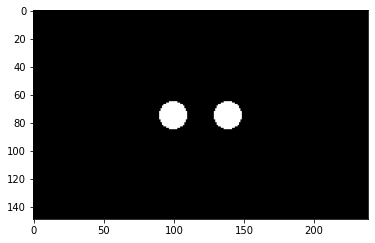

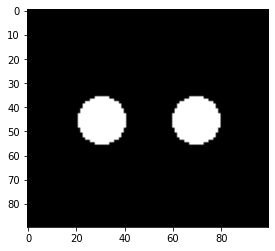

In [13]:
y_full = signal.fftconvolve(x, d, mode='full')
# y_valid = signal.fftconvolve(x, d, mode='valid') #Remember that sx_a > sx_b && sy_a > sy_b
y_same = signal.fftconvolve(x, d, mode='same')

plt.imshow(y_full, cmap='gray')
plt.show()
# plt.imshow(y_valid, cmap='gray')
# plt.show()
plt.imshow(y_same, cmap='gray')
plt.show()

The results are:
 - Full: It has generated the correct shape. The resulting size is the sum of booth inputs (100,90)*(140,60)=(240,150).
 - Valid: None.
 - Same: It has generated the correct shape. The resulting size is input_1's size (100,90)*(140,60)=(100,90).

## Part IV

To finish, we repeat the simulation (part III) without the fftconvovle() but with applying the DFT formula.

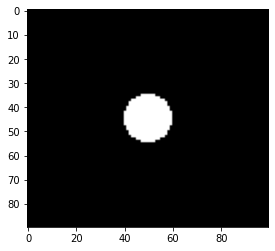

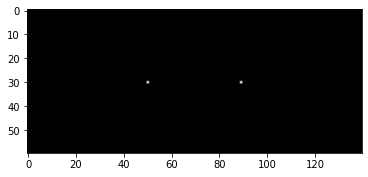

In [14]:
#Images' size:
size_x_disk=100
size_y_disk=90
size_x_impulse=140
size_y_impulse=60


#Image with disk: x(t)
def surface_disk(radi,sx,sy):
    arr = np.zeros((sy, sx), dtype=float)
    rr, cc = draw.disk(((sy-1)/2,(sx-1)/2),radi)
    arr[rr, cc] = 1
    return arr

radius=10
x=surface_disk(radius,size_x_disk,size_y_disk)

plt.imshow(x, cmap='gray')
plt.show()



#Image with impulses: d(t)
def sources_s(dist,sx,sy):
    output=np.zeros((sy,sx), dtype=float) #Generates a sy by sx null matrix
    output[math.floor(sy/2),math.ceil((sx-1)/2-dist)]=1  #Sets to 1 a position at distance -dist respect to the center
    output[math.floor(sy/2),math.floor((sx-1)/2+dist)]=1 #Sets to 1 a position at distance +dist respect to the center
    return output

distance=20
d=sources_s(distance,size_x_impulse,size_y_impulse)

plt.imshow(d, cmap='gray')
plt.show()



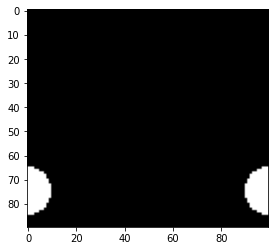

In [15]:
# Compute 2D convolution y(t)=x(t)*h(t)
y=np.zeros((len(x),len(x[0])), dtype=float)
for m in range(len(x)):
    for n in range(len(x[0])):
        for i in range(len(d)):
            for j in range(len(d)):
                y[m,n]=y[m,n]+d[i,j]*x[m-i,n-j]

plt.imshow(y, cmap='gray')
plt.show()

We can observe:
 - The shape is wrong. The circles are not centered w.r.t. the middle height. The observable distance is 50, intead of 20.
 - The resulting size is input_1's size (100,90)*(140,60)=(100,90). Like 'same' mode.